# # SWAN Transect Analysis and Spectral Visualization
 
This notebook processes SWAN outputs to:
- Visualize the wave height and direction over a spatial domain
- Plot 1D frequency spectra
- Analyze wave height along a transect

## ## 1. Import Packages


In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from read_swan_1d_spectrum import read_swan_1d_spectrum
import pandas as pd

## ## 2. Read Input Data
- MATLAB `.mat` file for 2D spatial data
- SWAN text spectrum output
- Transect file from SWAN

In [20]:

data = scipy.io.loadmat('../../SWAN_Example/Result.mat')

df = pd.read_csv('../../SWAN_Example/swan_transect1.tab', 
                 sep='\\s+',
                 comment='%', 
                 header=None,
                 names=['XP', 'YP', 'HSIGN', 'RTP', 'BOTLEV', 'PDIR'])

frequencies1, vadens1, dir_mean1, dspred1 = read_swan_1d_spectrum("../../SWAN_Example/swan_specout1.txt")
frequencies2, vadens2, dir_mean2, dspred2 = read_swan_1d_spectrum("../../SWAN_Example/swan_specout2.txt")

bulkp1 = pd.read_csv('../../SWAN_Example/swan_specout_bulk1.txt', 
                 sep='\\s+',
                 comment='%', 
                 header=None,
                 names=['XP', 'YP', 'HSIGN', 'RTP', 'DIR', 'TM01', 'TM02',
                        'TMM10', 'PDIR', 'BOTLEV'])

bulkp2 = pd.read_csv('../../SWAN_Example/swan_specout_bulk2.txt', 
                 sep='\\s+',
                 comment='%', 
                 header=None,
                 names=['XP', 'YP', 'HSIGN', 'RTP', 'DIR', 'TM01', 'TM02',
                        'TMM10', 'PDIR', 'BOTLEV'])


## ## 3. Spatial Visualization: Wave Heights and Directions


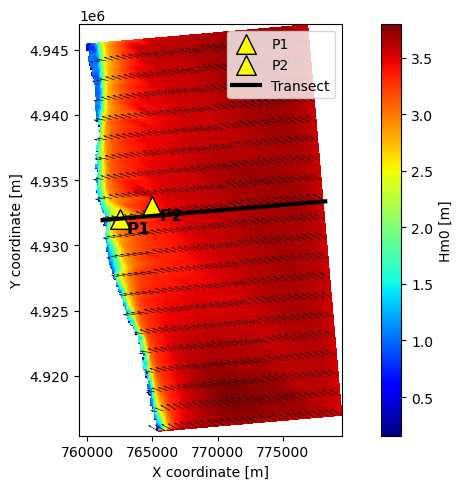

In [21]:
# Extract variables
Xp = data['Xp']    
Yp = data['Yp']    
Hs = data['Hsig']  
Tp = data['RTpeak']  
Dir = data['PkDir']  
Tm01 = data['Tm01']  
Tm02 = data['Tm02']  
Botlev = data['Botlev']  

# Target location
P1 = (bulkp1['XP'][0], bulkp1['YP'][0])
P2 = (bulkp2['XP'][0], bulkp2['YP'][0])

# Convert directions from nautical to radians (matplotlib convention)
mask = np.isfinite(Hs) & np.isfinite(Dir)
Hs[~mask] = np.nan
Dir[~mask] = np.nan
theta_rad = np.radians((270 - Dir) % 360)
Hmx = Hs * np.cos(theta_rad)
Hmy = Hs * np.sin(theta_rad)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
c = ax.pcolormesh(Xp, Yp, Hs, shading='auto', cmap='jet')
skip = (slice(None, None, 5), slice(None, None, 15))
q = ax.quiver(Xp[skip], Yp[skip], Hmx[skip], Hmy[skip], color='k', scale=75)

# Add target marker
ax.scatter(P1[0], P1[1], facecolor='yellow', edgecolors='black', marker='^', 
           label='P1', s=200)
ax.scatter(P2[0], P2[1], facecolor='yellow', edgecolors='black', marker='^', 
           label='P2', s=200)
ax.annotate('P1', xy=(P1[0], P1[1]), xytext=(5, -10),
            textcoords="offset points", fontsize=12, color='Black', weight='bold')
ax.annotate('P2', xy=(P2[0], P2[1]), xytext=(5, -10),
            textcoords="offset points", fontsize=12, color='Black', weight='bold')
# Transect line
ax.plot(df['XP'], df['YP'], 'k', linewidth=3, label='Transect')

# Colorbar and labels
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Hm0 [m]')
ax.set_xlabel('X coordinate [m]')
ax.set_ylabel('Y coordinate [m]')
ax.set_aspect('equal')
ax.legend()

plt.tight_layout()
plt.show()

## ## 4. 1D Frequency Spectrum


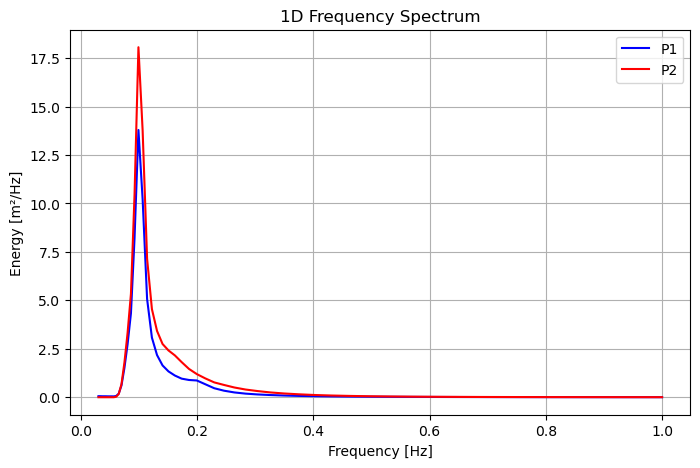

         XP         YP  HSIGN    RTP    DIR   TM01   TM02  TMM10   PDIR  \
0  762500.0  4932000.0  2.815  10.12  98.67  7.406  5.958   8.76  100.0   

   BOTLEV  
0   5.555  
 
         XP         YP  HSIGN    RTP    DIR  TM01   TM02  TMM10   PDIR  BOTLEV
0  765000.0  4933000.0  3.382  10.12  110.5  6.99  5.754  8.358  110.0   11.09


In [22]:
plt.figure(figsize=(8, 5))
plt.plot(frequencies1, vadens1, color = 'b', marker='none', label = 'P1')
plt.plot(frequencies2, vadens2, color = 'r', marker='none', label = 'P2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Energy [m²/Hz]')
plt.legend()
plt.title('1D Frequency Spectrum')
plt.grid()
plt.show()

print(bulkp1)
print(' ')
print(bulkp2)


## ## 5. Transect Wave Height Analysis

In [25]:
a = 3.82

df = df[df['BOTLEV'] > -90]
df = df[df['HSIGN'] >  0]
df['TPEAK'] = np.sqrt(df['HSIGN']) * a
display(df)

,XP,YP,HSIGN,RTP,BOTLEV,PDIR,TPEAK,Length
3,777989.0,4933348.0,3.54244,10.1181,23.2849,120.0,7.189764,0.000000
4,777904.0,4933342.0,3.55574,10.1181,23.2298,120.0,7.203248,85.211502
5,777819.0,4933334.0,3.56670,10.1181,23.1678,120.0,7.214341,170.587142
6,777733.0,4933327.0,3.57598,10.1181,23.0816,120.0,7.223720,256.871556
7,777648.0,4933320.0,3.58392,10.1181,22.9816,120.0,7.231735,342.159304
...,...,...,...,...,...,...,...,...
194,761704.0,4931977.0,1.95621,10.1181,3.0470,100.0,5.342827,16343.135114
195,761618.0,4931970.0,1.73188,10.1181,2.3309,100.0,5.027155,16429.419528
196,761533.0,4931962.0,1.46087,10.1181,1.8113,100.0,4.617099,16514.795168
197,761448.0,4931956.0,1.21950,10.1181,1.2939,100.0,4.218463,16600.006670


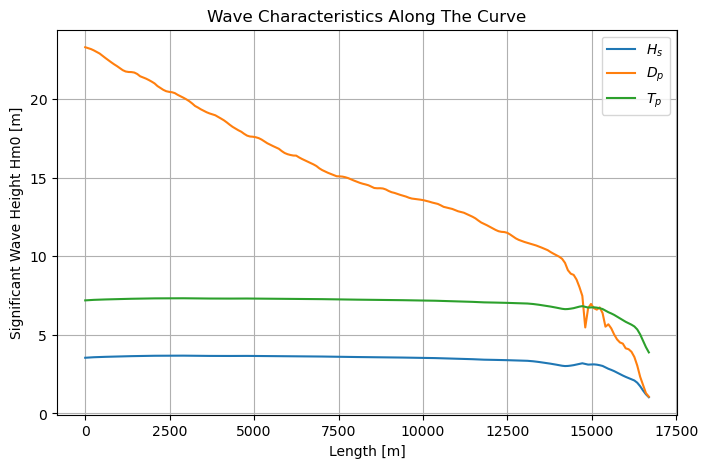

In [26]:
# Compute cumulative distance along transect
dx = np.diff(df['XP'])
dy = np.diff(df['YP'])
distances = np.sqrt(dx**2 + dy**2)
distances = np.insert(distances, 0, 0)
df['Length'] = np.cumsum(distances)

# Plot Hsig along the transect
plt.figure(figsize=(8,5))
plt.plot(df['Length'] , df['HSIGN'], label = f'$H_{{s}}$')
plt.plot(df['Length'] , df['BOTLEV'], label='$D_p$')
plt.plot(df['Length'] , df['TPEAK'], label='$T_p$')
plt.xlabel('Length [m]')
plt.ylabel('Significant Wave Height Hm0 [m]')
# plt.ylim(2.5, 3.75)
plt.title('Wave Characteristics Along The Curve')
plt.legend()
plt.grid(True)
plt.show()
